In [62]:
#import packages
import os
import pandas as pd # data frame handling
import numpy as np # general package for data analysis
from scipy.io import loadmat #for matlab import to python
import matplotlib.pyplot as plt #figures
from sklearn.decomposition import PCA

In [63]:
path = "/Users/biapt/Desktop/Dimensionality Reduction/results/011PD/Time-resolved wPLI/alpha"
dirs = os.listdir(path)
states = []
states_num = []

for file in dirs:
    state = file[20:26]
    states.append(state)
    states_numbered = "state"+ str(len(states)-1)
    states_num.append(states_numbered)

#states.pop(0)
#states_num.pop(0)
print("\nTotal number of states: ", len(states))
print("Total states:", states)
print("\nStates used in the analysis:", states_num)


Total number of states:  3
Total states: ['fe4de2', 'fenta4', 'sedoff']

States used in the analysis: ['state0', 'state1', 'state2']


## Alpha

The size of this dataset is:  (286, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD sedoff (Alpha)')

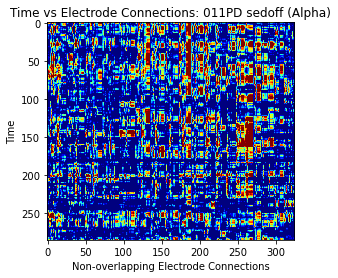

In [64]:
rest_step = loadmat('/Users/biapt/Desktop/Dimensionality Reduction/results/011PD/Time-resolved wPLI/alpha/wpli_TR_alpha_011PD_sedoff.mat')
data_rest = rest_step['result_wpli_TR']
print("The size of this dataset is: ",data_rest.shape)

# Determine the size of 2D array
time = data_rest.shape[0] # length of the time stamp
num_elect = data_rest.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# create 2D data for all the time stamps
data_2d_rest = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_rest[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_rest[i] = data_long
    
# print 2D data
plt.imshow(data_2d_rest, cmap = "jet")
plt.clim(0, 0.25)
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.title('Time vs Electrode Connections: 011PD sedoff (Alpha)')

The size of this dataset is:  (429, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD fe4de2 (Alpha)')

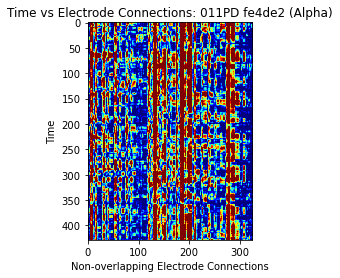

In [73]:
anes_step = loadmat('/Users/biapt/Desktop/Dimensionality Reduction/results/011PD/Time-resolved wPLI/alpha/wpli_TR_alpha_011PD_fe4de2.mat')
data_anes1 = anes_step['result_wpli_TR']
data_anes1.shape
print("The size of this dataset is: ",data_anes1.shape)

# determine the size of 2d array
time = data_anes1.shape[0] # length of the time stamp
num_elect = data_anes1.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# create 2D data for all the time stamps
data_2d_anes1 = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_anes1[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_anes1[i] = data_long
    
plt.imshow(data_2d_anes1, cmap = "jet")
plt.clim(0, 0.25)
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.title('Time vs Electrode Connections: 011PD fe4de2 (Alpha)')

The size of this dataset is:  (715, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD (Alpha)')

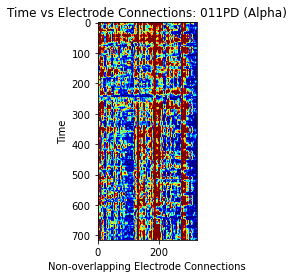

In [74]:
# combine the rest state and anes state data
data_combined = np.concatenate ((data_rest, data_anes1))
data_combined.shape
print("The size of this dataset is: ",data_combined.shape)

# 2D data calculation
time = data_combined.shape[0] # length of the time stamp
num_elect = data_combined.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# 2D data
data_2d_combined = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_combined[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_combined[i] = data_long
    
plt.imshow(data_2d_combined, cmap = "jet")
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.clim(0, 0.25)
plt.title('Time vs Electrode Connections: 011PD (Alpha)')

explained variance [1.48038838 0.77192136]
explained variance ratio: [0.26906725 0.14030018]
original shape:    (715, 325)
transformed shape: (715, 2)


Text(0.5, 1.0, '011PD PCA Analysis (Alpha)')

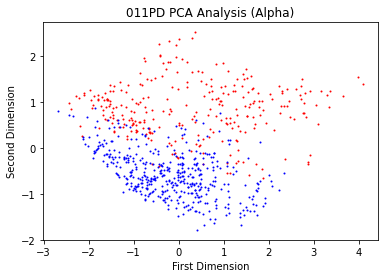

In [75]:
# PCA analysis
pca = PCA(n_components=2)
pca.fit(data_2d_combined)
combined_pca = pca.transform(data_2d_combined)

print("explained variance", pca.explained_variance_)
print("explained variance ratio:",pca.explained_variance_ratio_)
print("original shape:   ", data_2d_combined.shape)
print("transformed shape:", combined_pca.shape)

#time stamp
time1 = data_rest.shape[0]
time2 = data_combined.shape[0]

# plot rest state pca in red
plt.scatter(combined_pca[range(time1),0], combined_pca[range(time1),1], s=1, color='red')
# plot anes state pca in blue
plt.scatter(combined_pca[range(time1,time2),0], combined_pca[range(time1,time2),1], s=1, color='blue')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('011PD PCA Analysis (Alpha)')

Text(0.5, 1.0, 'Explained_Variance_alpha')

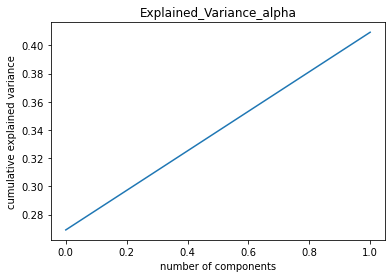

In [76]:
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained_Variance_alpha')

## Theta 

The size of this dataset is:  (286, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD sedoff (Theta)')

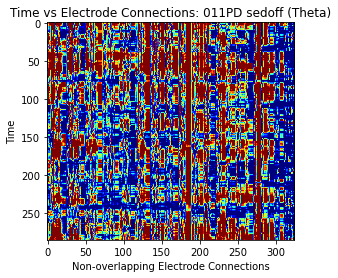

In [77]:
rest_step = loadmat('/Users/biapt/Desktop/Dimensionality Reduction/results/011PD/Time-resolved wPLI/theta/wpli_TR_theta_011PD_sedoff.mat')
data_rest = rest_step['result_wpli_TR']
print("The size of this dataset is: ",data_rest.shape)

# Determine the size of 2D array
time = data_rest.shape[0] # length of the time stamp
num_elect = data_rest.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# create 2D data for all the time stamps
data_2d_rest = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_rest[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_rest[i] = data_long
    
# print 2D data
plt.imshow(data_2d_rest, cmap = "jet")
plt.clim(0, 0.25)
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.title('Time vs Electrode Connections: 011PD sedoff (Theta)')

The size of this dataset is:  (429, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD fe4de2 (Theta)')

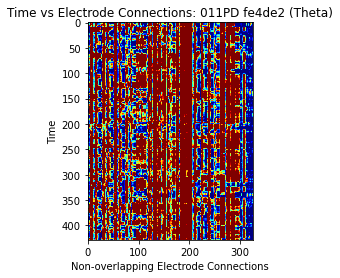

In [78]:
anes_step = loadmat('/Users/biapt/Desktop/Dimensionality Reduction/results/011PD/Time-resolved wPLI/theta/wpli_TR_theta_011PD_fe4de2.mat')
data_anes1 = anes_step['result_wpli_TR']
data_anes1.shape
print("The size of this dataset is: ",data_anes1.shape)

# determine the size of 2d array
time = data_anes1.shape[0] # length of the time stamp
num_elect = data_anes1.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# create 2D data for all the time stamps
data_2d_anes1 = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_anes1[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_anes1[i] = data_long
    
plt.imshow(data_2d_anes1, cmap = "jet")
plt.clim(0, 0.25)
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.title('Time vs Electrode Connections: 011PD fe4de2 (Theta)')

The size of this dataset is:  (715, 26, 26)


Text(0.5, 1.0, 'Time vs Electrode Connections: 011PD (Theta)')

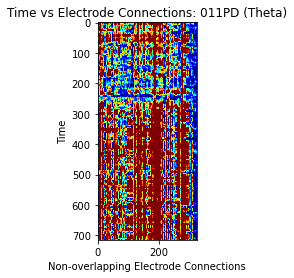

In [79]:
# combine the rest state and anes state data
data_combined = np.concatenate ((data_rest, data_anes1))
data_combined.shape
print("The size of this dataset is: ",data_combined.shape)

# 2D data calculation
time = data_combined.shape[0] # length of the time stamp
num_elect = data_combined.shape[1] # number of electrodes

# calculate the length of reduced electrode-electrode data
# upper triangle of the data
empty_array = np.zeros([num_elect, num_elect])
half_data = empty_array[np.triu_indices(num_elect-1)]
elect_connect = half_data.shape[0]

# 2D data
data_2d_combined = np.zeros([time,elect_connect])

for i in range (time):
    data_at_time = data_combined[i,:]
    data_long = data_at_time[np.triu_indices(num_elect-1)]
    data_2d_combined[i] = data_long
    
plt.imshow(data_2d_combined, cmap = "jet")
plt.xlabel('Non-overlapping Electrode Connections')
plt.ylabel('Time')
plt.clim(0, 0.25)
plt.title('Time vs Electrode Connections: 011PD (Theta)')

explained variance [3.80346631 1.05837891]
explained variance ratio: [0.3737617  0.10400552]
original shape:    (715, 325)
transformed shape: (715, 2)


Text(0.5, 1.0, '011PD PCA Analysis (Theta)')

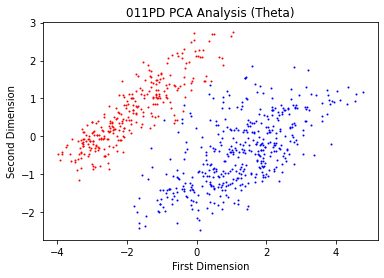

In [80]:
# PCA analysis
pca = PCA(n_components=2)
pca.fit(data_2d_combined)
combined_pca = pca.transform(data_2d_combined)

print("explained variance", pca.explained_variance_)
print("explained variance ratio:",pca.explained_variance_ratio_)
print("original shape:   ", data_2d_combined.shape)
print("transformed shape:", combined_pca.shape)

#time stamp
time1 = data_rest.shape[0]
time2 = data_combined.shape[0]

# plot rest state pca in red
plt.scatter(combined_pca[range(time1),0], combined_pca[range(time1),1], s=1, color='red')
# plot anes state pca in blue
plt.scatter(combined_pca[range(time1,time2),0], combined_pca[range(time1,time2),1], s=1, color='blue')

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('011PD PCA Analysis (Theta)')

Text(0.5, 1.0, 'Explained_Variance_theta')

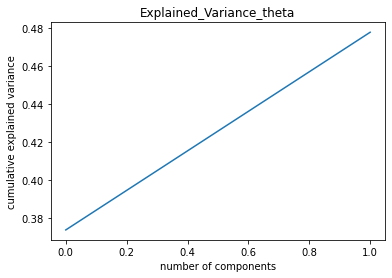

In [81]:
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained_Variance_theta')